In [1]:
# Install the torch package
%pip install torch numpy matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib.pyplot as plt

from goyalWelchData import GoyalWelchData
from flexibleMLP import FlexibleMLP
from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = GoyalWelchData(input_file='spy_monthly_returns.csv', symbol='SPY')
X_train, X_test, y_train, y_test, test_dates = goyal_welch_data.get_train_and_test_data()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/workspaces/Quantative-Macroeconomics-with-Python/notebooks/goyalWelchData.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.goyal_welch_data['excess_returns'] = self.monthly_returns[symbol] - self.goyal_welch_data.Rfree


In [3]:
# Initialize the deep neural network model
num_seeds = 10
ridge_penalty = 0.001

FlexibleMLP.set_seed(42)
width = 256 # also try 100
model_architecture = [X_train.shape[1], width, width, 1]
models = [FlexibleMLP(model_architecture) for seed in range(num_seeds)]

# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
for seed in range(num_seeds):

  FlexibleMLP.set_seed(seed)
  criterion = nn.MSELoss()
  # do not forget to experiment with both SGD and Adam
  # optimizer = optim.Adam(models[seed].parameters(), lr=0.001) #, weight_decay=0)  # Using Adam optimizer for better performance with deep networks
  optimizer = optim.SGD(models[seed].parameters(), lr=0.1)

  train_model(num_epochs=200, # try also 200, 400 could be slow, but we do need more epochs to achieve interpolation
              train_loader=train_loader,
              criterion=criterion,
              optimizer=optimizer,
              model=models[seed],
              ridge_penalty=ridge_penalty)

Epoch [20/200], Loss: 0.4949
Epoch [40/200], Loss: 0.4714


Epoch [60/200], Loss: 0.4494


Epoch [80/200], Loss: 0.4285
Epoch [100/200], Loss: 0.4086


Epoch [120/200], Loss: 0.3890


Epoch [140/200], Loss: 0.3712
Epoch [160/200], Loss: 0.3537


Epoch [180/200], Loss: 0.3372
Epoch [200/200], Loss: 0.3217


Epoch [20/200], Loss: 0.4907
Epoch [40/200], Loss: 0.4670


Epoch [60/200], Loss: 0.4454
Epoch [80/200], Loss: 0.4252


Epoch [100/200], Loss: 0.4044
Epoch [120/200], Loss: 0.3856


Epoch [140/200], Loss: 0.3678
Epoch [160/200], Loss: 0.3505


Epoch [180/200], Loss: 0.3340
Epoch [200/200], Loss: 0.3182


Epoch [20/200], Loss: 0.4876
Epoch [40/200], Loss: 0.4661


Epoch [60/200], Loss: 0.4428
Epoch [80/200], Loss: 0.4224


Epoch [100/200], Loss: 0.4021
Epoch [120/200], Loss: 0.3830


Epoch [140/200], Loss: 0.3653
Epoch [160/200], Loss: 0.3486


Epoch [180/200], Loss: 0.3319


Epoch [200/200], Loss: 0.3167


Epoch [20/200], Loss: 0.4941
Epoch [40/200], Loss: 0.4710


Epoch [60/200], Loss: 0.4486
Epoch [80/200], Loss: 0.4275


Epoch [100/200], Loss: 0.4082
Epoch [120/200], Loss: 0.3893


Epoch [140/200], Loss: 0.3702
Epoch [160/200], Loss: 0.3530


Epoch [180/200], Loss: 0.3370
Epoch [200/200], Loss: 0.3208


Epoch [20/200], Loss: 0.4910
Epoch [40/200], Loss: 0.4679


Epoch [60/200], Loss: 0.4460
Epoch [80/200], Loss: 0.4247


Epoch [100/200], Loss: 0.4049
Epoch [120/200], Loss: 0.3863


Epoch [140/200], Loss: 0.3676
Epoch [160/200], Loss: 0.3512


Epoch [180/200], Loss: 0.3344
Epoch [200/200], Loss: 0.3184


Epoch [20/200], Loss: 0.4849


Epoch [40/200], Loss: 0.4631
Epoch [60/200], Loss: 0.4410


Epoch [80/200], Loss: 0.4207


Epoch [100/200], Loss: 0.4008
Epoch [120/200], Loss: 0.3821


Epoch [140/200], Loss: 0.3648


Epoch [160/200], Loss: 0.3475
Epoch [180/200], Loss: 0.3310


Epoch [200/200], Loss: 0.3158
Epoch [20/200], Loss: 0.4930


Epoch [40/200], Loss: 0.4690
Epoch [60/200], Loss: 0.4471


Epoch [80/200], Loss: 0.4262
Epoch [100/200], Loss: 0.4059


Epoch [120/200], Loss: 0.3877
Epoch [140/200], Loss: 0.3697


Epoch [160/200], Loss: 0.3518
Epoch [180/200], Loss: 0.3363


Epoch [200/200], Loss: 0.3201
Epoch [20/200], Loss: 0.5002


Epoch [40/200], Loss: 0.4768
Epoch [60/200], Loss: 0.4544


Epoch [80/200], Loss: 0.4328
Epoch [100/200], Loss: 0.4125


Epoch [120/200], Loss: 0.3928
Epoch [140/200], Loss: 0.3746


Epoch [160/200], Loss: 0.3573
Epoch [180/200], Loss: 0.3404


Epoch [200/200], Loss: 0.3244
Epoch [20/200], Loss: 0.4869


Epoch [40/200], Loss: 0.4646


Epoch [60/200], Loss: 0.4424


Epoch [80/200], Loss: 0.4220


Epoch [100/200], Loss: 0.4024
Epoch [120/200], Loss: 0.3840


Epoch [140/200], Loss: 0.3659
Epoch [160/200], Loss: 0.3487


Epoch [180/200], Loss: 0.3322


Epoch [200/200], Loss: 0.3162
Epoch [20/200], Loss: 0.4809


Epoch [40/200], Loss: 0.4594
Epoch [60/200], Loss: 0.4371


Epoch [80/200], Loss: 0.4163
Epoch [100/200], Loss: 0.3971


Epoch [120/200], Loss: 0.3783
Epoch [140/200], Loss: 0.3606


Epoch [160/200], Loss: 0.3436
Epoch [180/200], Loss: 0.3278


Epoch [200/200], Loss: 0.3126


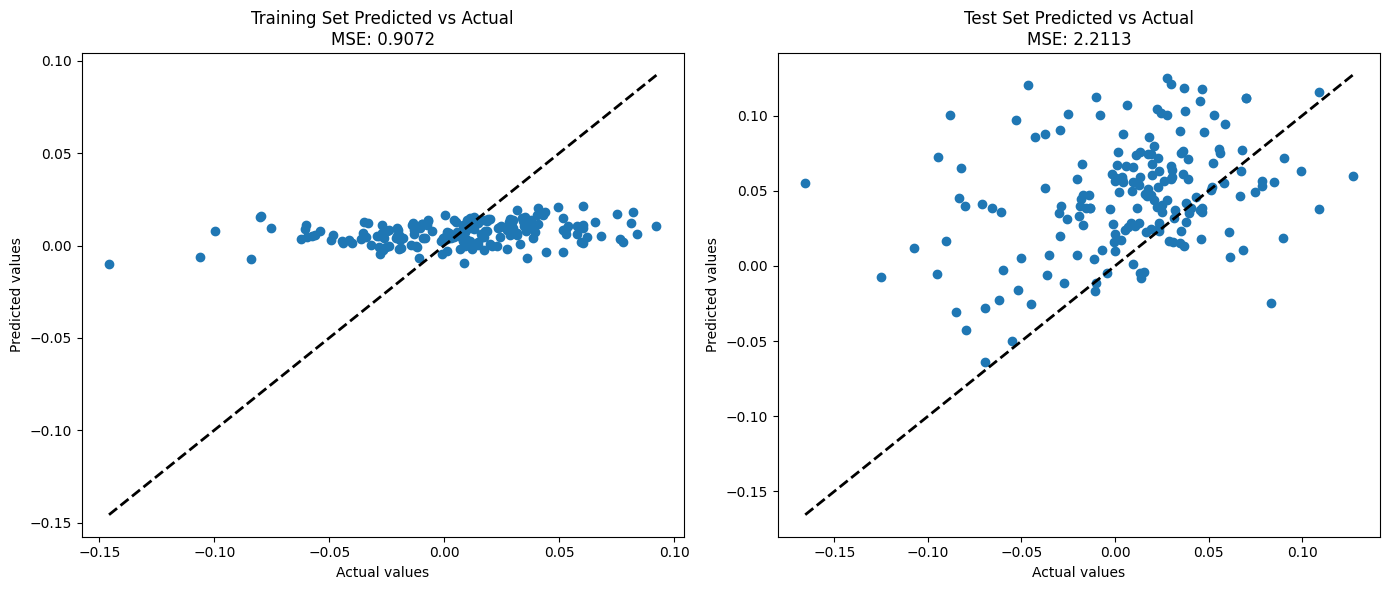

In [4]:
# Get predictions for both training and test sets
train_sample = [get_predictions(train_loader, models[seed]) for seed in range(num_seeds)]
test_sample = [get_predictions(test_loader, models[seed]) for seed in range(num_seeds)]
train_targets = train_sample[0][0]

#
train_predictions = np.concatenate([train_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1).mean(1)

test_targets = test_sample[0][0]
all_test_predictions = np.concatenate([test_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1)
test_predictions = all_test_predictions.mean(1)

# Calculate MSE for both training and test sets
train_mse = np.mean((train_targets - train_predictions) ** 2) / np.mean(train_targets ** 2)
test_mse = np.mean((test_targets.reshape(-1, 1) - test_predictions) ** 2) / np.mean(test_targets ** 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set subplot
axs[0].scatter(train_targets, train_predictions)
axs[0].plot([train_targets.min(), train_targets.max()], [train_targets.min(), train_targets.max()], 'k--', lw=2)  # Diagonal line
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title(f'Training Set Predicted vs Actual\nMSE: {train_mse:.4f}')

# Test set subplot
axs[1].scatter(test_targets, test_predictions)#.mean(1))
axs[1].plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)  # Diagonal line
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title(f'Test Set Predicted vs Actual\nMSE: {test_mse:.4f}')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, '0    0.59\n1    1.18\ndtype: float32')

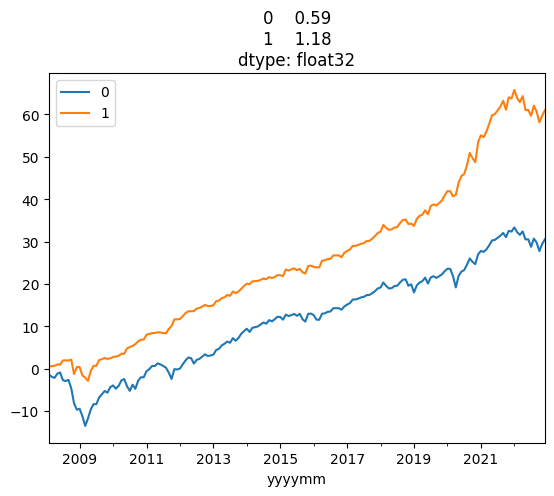

In [5]:
# now I define R_{t+1} * pi_t
# test_predictions have 10 columns, each column corresponding to a different random seed
timed_returns = test_targets.reshape(-1, 1) * test_predictions.reshape(-1, 1)
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')

In [6]:
model = models[0]
model.eval()
train_data_predictions, train_data_features = model(X_train_tensor, return_last_hidden=True)
print(train_data_predictions.shape)
print(train_data_features.shape)

test_data_predictions, test_data_features = model(X_test_tensor, return_last_hidden=True)


torch.Size([179, 1])
torch.Size([179, 256])


In [7]:
output_layer = list(model.layers)[-1]  # Get the last layer
# Now, access its weights and biases
weights = output_layer.weight.data
biases = output_layer.bias.data
print("Weights of the output layer:", weights)
print("Biases of the output layer:", biases)

Weights of the output layer: tensor([[-4.4137e-02, -5.1278e-02, -2.9257e-02, -2.5685e-02, -8.8156e-03,
         -5.1425e-02,  6.7762e-02, -3.2911e-02, -1.0705e-01, -3.2386e-02,
         -9.3694e-02, -9.6580e-03,  8.2798e-03,  1.3503e-02, -2.7499e-02,
         -3.1447e-02,  1.8855e-02,  3.2261e-02, -6.4001e-02,  1.4673e-02,
          4.7704e-02, -2.3852e-02,  4.4333e-02, -2.1174e-02, -1.7169e-02,
         -6.3131e-02, -1.7418e-02, -9.6851e-02, -1.6731e-01,  9.1345e-03,
         -4.6352e-02,  4.0780e-02, -2.7343e-03,  6.2367e-02,  2.3704e-02,
          1.4630e-02, -2.0824e-02, -6.9295e-02, -9.3868e-02, -2.4119e-02,
          1.2173e-02,  5.7025e-02, -3.0433e-02,  3.6988e-02,  4.4058e-02,
         -4.3155e-02, -6.9971e-03, -3.9710e-02, -3.5977e-02,  2.7211e-02,
         -7.0434e-02,  1.4464e-01,  3.3109e-02, -7.0996e-02,  1.0920e-02,
         -2.7710e-02, -3.6738e-02, -2.3635e-02, -3.9187e-02,  8.6796e-03,
         -2.1776e-03,  3.7156e-02,  2.4438e-02, -1.5551e-02,  4.2918e-02,
         

#Note that
$$
f(x)\ =\ \sum_{i=1}^n W_{3,i}h_i(x) +b_3\cdot 1
$$
#and hence, to re-produce the output of the neural net, we need to add an "additional" feature equal to 1. We do this using torch.ones([train_data_features.shape[0], 1])

In [8]:
new_X_train = torch.concatenate([train_data_features, torch.ones([train_data_features.shape[0], 1])], axis=1)
new_X_test = torch.concatenate([test_data_features, torch.ones([test_data_features.shape[0], 1])], axis=1)


In [9]:
shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=new_X_train.detach().numpy(),
                                                                labels=y_train,
                                                                future_signals=new_X_test.detach().numpy(),
                                                                shrinkage_list=shrinkage_list)


In [10]:
fine_tuned_mse = np.mean((test_targets.reshape(-1, 1) - oos_predictions) ** 2, axis=0) / np.mean((test_targets) ** 2)
print(fine_tuned_mse)

[132.76391388  59.79409418  28.77888563   6.23751241   0.92635917
   0.9058349    0.97032537   0.9911566    0.99887536   0.99988442]


Text(0.5, 1.0, '0     0.59\n1     0.12\n2     0.90\n3     0.93\n4     0.98\n5     1.02\n6     1.09\n7     0.66\n8     0.54\n9     0.53\n10    0.53\ndtype: float64')

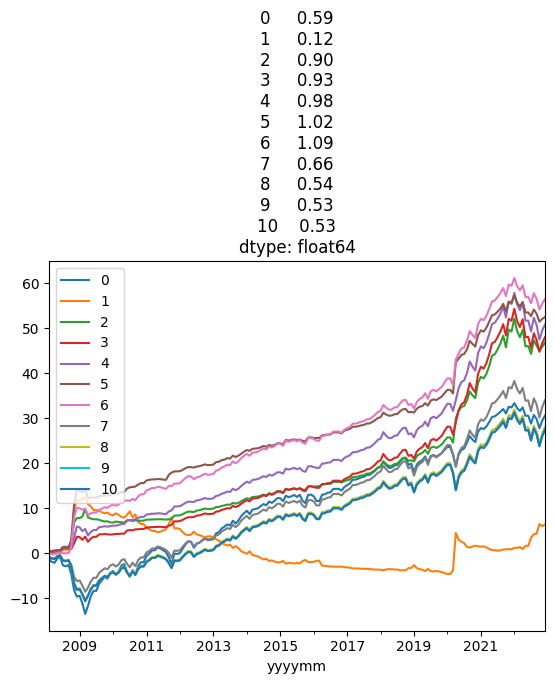

In [11]:
timed_returns = test_targets.reshape(-1, 1) * oos_predictions
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')